# CALIFORNIA HOUSING PRICES DATA MODELLING

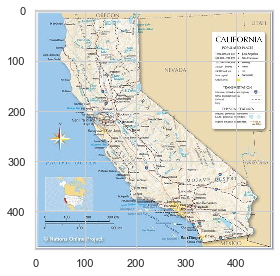

In [92]:
from skimage import io
img = io.imread("California.png")
io.imshow(img)

### Step 1: Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler 
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error, mean_squared_error
%matplotlib inline

### Step 2: Reading the data

In [3]:
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Step 3: Exploring the data

In [3]:
pd.set_option("display.max.columns", None)
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10397,-117.67,33.56,4.0,3289.0,728.0,1345.0,632.0,4.6863,184400.0,<1H OCEAN
4026,-118.54,34.17,11.0,1080.0,174.0,386.0,160.0,6.1274,315900.0,<1H OCEAN
8175,-118.11,33.79,36.0,2223.0,370.0,1039.0,370.0,5.7942,257000.0,<1H OCEAN
9562,-120.62,37.35,18.0,874.0,203.0,572.0,190.0,1.6833,71000.0,INLAND
1280,-121.80,38.01,46.0,2273.0,495.0,1088.0,447.0,2.2532,109400.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe().style.background_gradient(cmap = 'Blues').set_properties( ** {'font-family':'Segoe UI'})

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Step 4: Visualizing the data

Text(0.5, 1.0, 'House Prices')

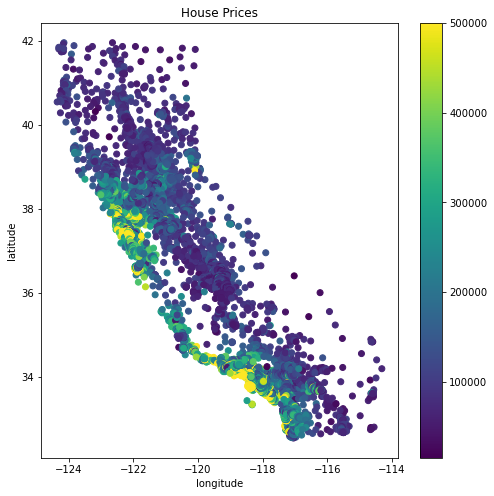

In [6]:
# Scatter graph
plt.figure(figsize = (8,8))
plt.scatter(df['longitude'] , df['latitude'] , c = df['median_house_value'])
plt.colorbar()
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("House Prices")

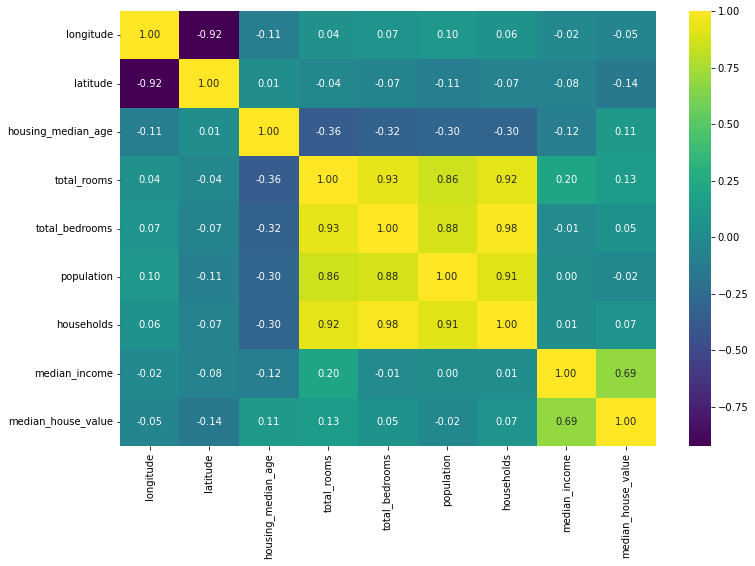

In [7]:
# HEATMAP
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'viridis')
plt.show()

###### Target variable median_house_value is very mildly correlated to all but one feature here: median_income, so one might outline this as an important feature.

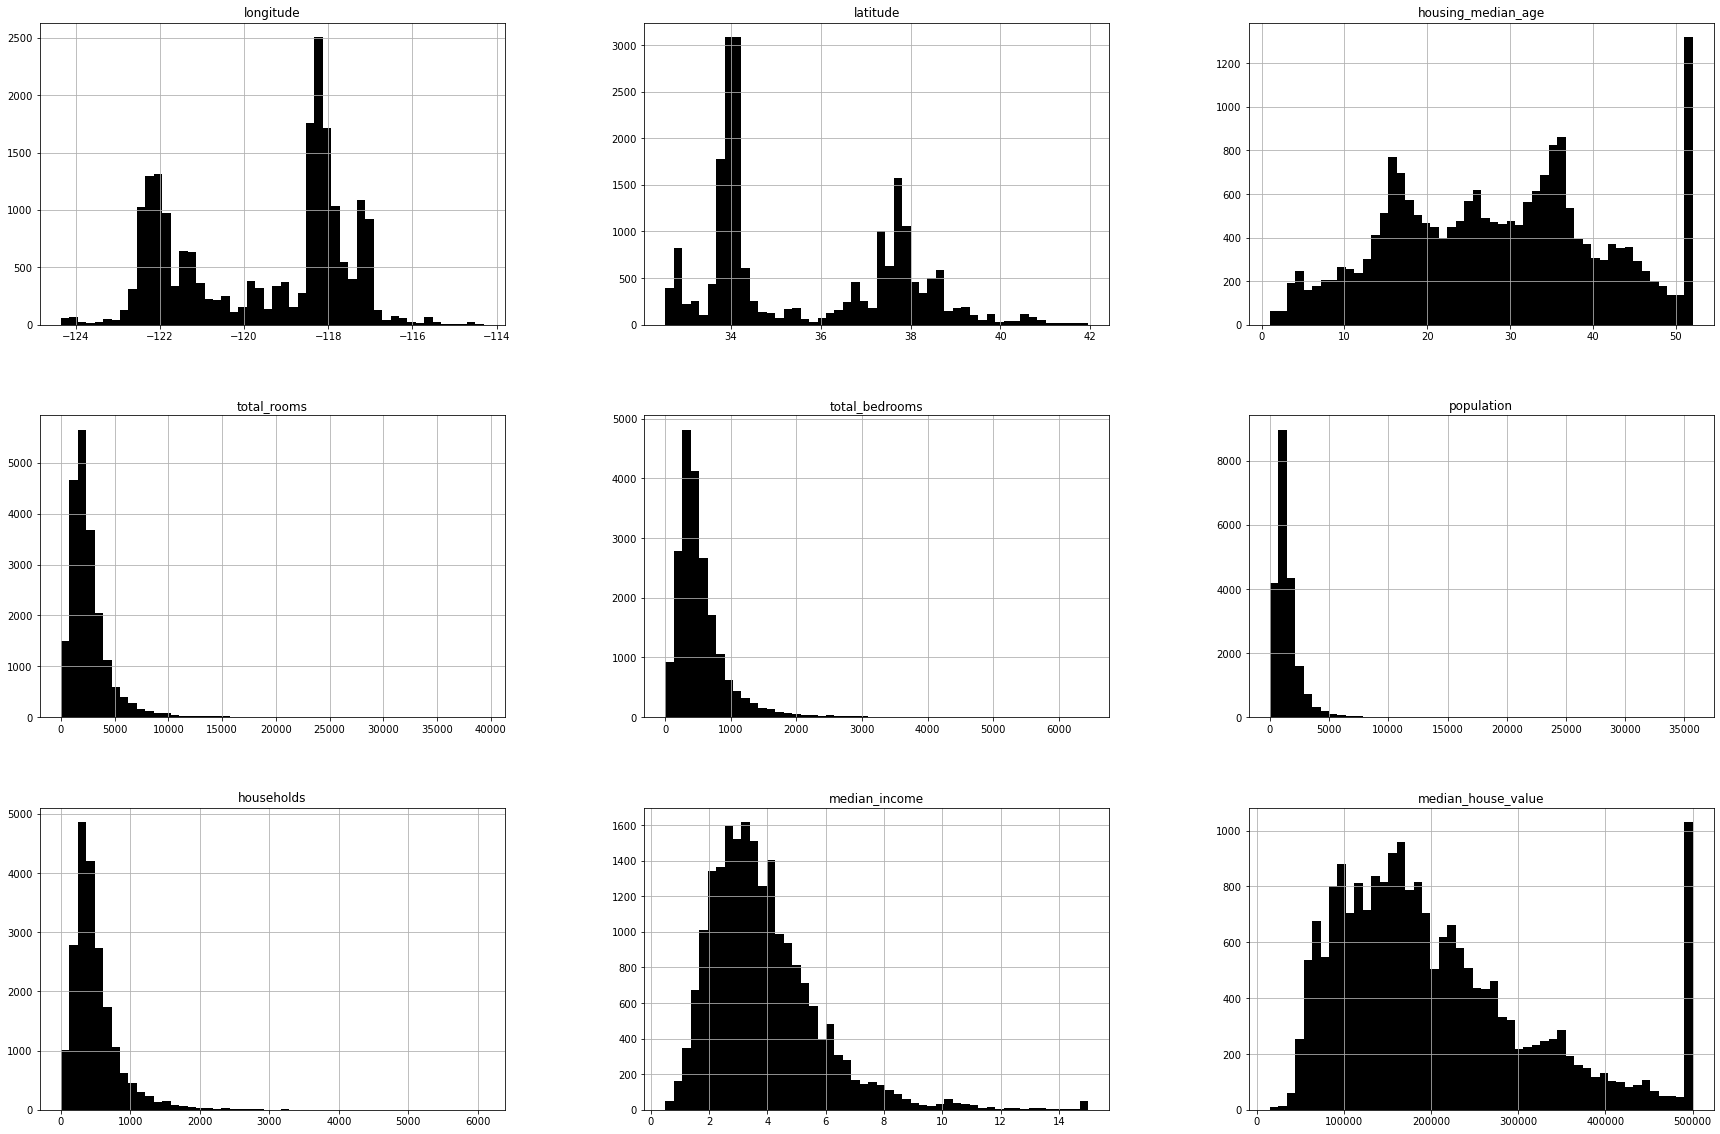

In [8]:
df.hist(bins = 50 , figsize=(30 , 20),color="k")
plt.show()

###### plot histogram to observe the data Distribution

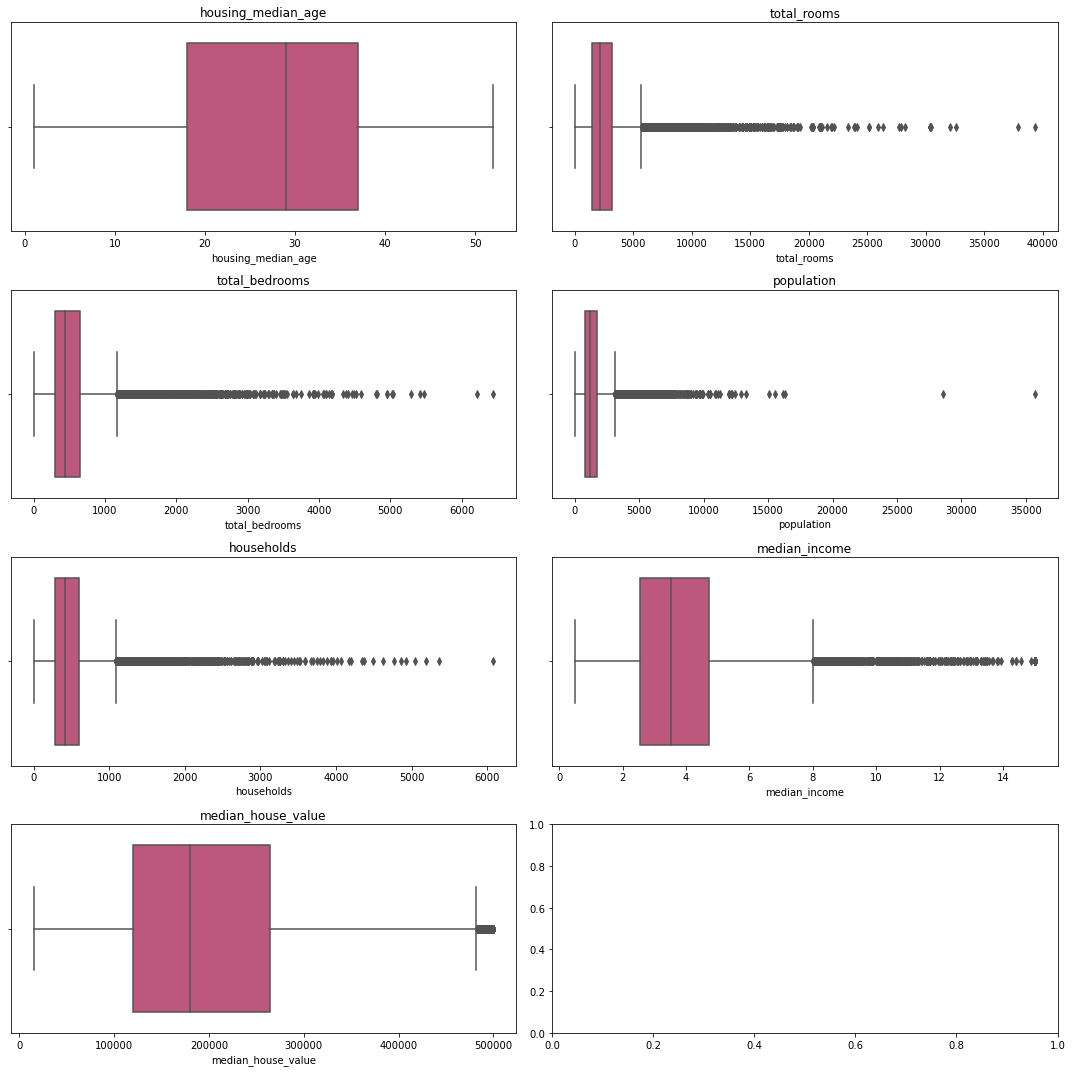

In [9]:
num_columns = list(df.select_dtypes(include=["int64","float64"]).columns)[2:]
fig, ax = plt.subplots(4,2, figsize = (15,15))
font_dict = {'fontsize': 14}
ax = np.ravel(ax)
for i in num_columns:
    sns.boxplot(data=df,x=i,ax=ax[num_columns.index(i)],palette="plasma").set_title(i)
ax = np.reshape(ax, (4, 2))
plt.tight_layout()
plt.show()

###### plot boxplot to observe the data Distribution and outliers

### Step 5: Drop duplicates values

In [10]:
print("Data shape Before duplicates Values: ",df.shape)
df_new=df.drop_duplicates()
print("Data shape After duplicates Values: ",df_new.shape)

Data shape Before duplicates Values:  (20640, 10)
Data shape After duplicates Values:  (20640, 10)


###### We note that there are no duplicates Values

### Step 6: Missing data

###### See how many missing data points we have

In [11]:
missing_values_df = df.isnull().sum()
print(missing_values_df)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


###### total_bedrooms is the only Column to have missing values in our dataset

In [12]:
#Percentage of missing data by feature
df_na = (missing_values_df / len(df)) * 100
# drop columns without missing values 
df_na = df_na.drop(df_na[df_na == 0].index)
#sort
df_na=df_na.sort_values(ascending=False)
print("Percentage of missing values in {} : {} %".format(df_na.index[0],df_na[0]))
total_cells = np.product(df.shape)
total_missing = missing_values_df.sum()
print("percent of data that is missing from all Dataset: {}%".format(round((total_missing/total_cells) * 100,ndigits=2)))

Percentage of missing values in total_bedrooms : 1.002906976744186 %
percent of data that is missing from all Dataset: 0.1%


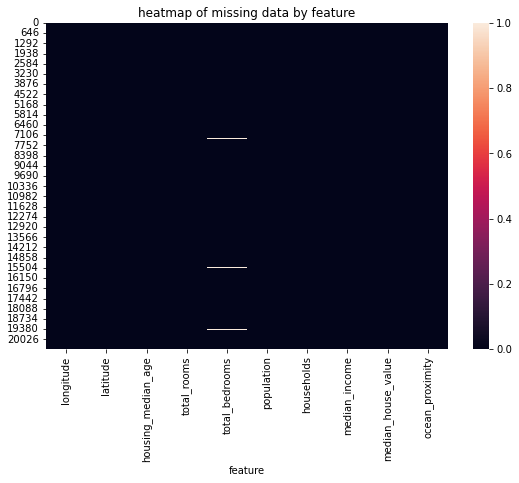

In [13]:
# create plot
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.isnull())
ax.set(title='heatmap of missing data by feature', xlabel='feature')
plt.show()

### Step 7: Filling in missing values

In [5]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4573,-118.27,34.06,33.0,1416.0,686.0,2013.0,614.0,1.9818,208300.0,<1H OCEAN
6558,-118.11,34.20,36.0,4915.0,725.0,1897.0,700.0,6.8270,359400.0,INLAND
20009,-119.06,36.15,25.0,2402.0,478.0,1527.0,461.0,2.3194,52900.0,INLAND
10660,-117.80,33.66,16.0,2542.0,498.0,1022.0,494.0,4.0000,223400.0,<1H OCEAN
15840,-122.43,37.75,52.0,2960.0,623.0,1191.0,589.0,3.9500,347700.0,NEAR BAY


In [15]:
def Zscore_outlier(column,df,scale=3.75):
    out=[]
    m = np.mean(df[column])
    sd = np.std(df[column])
    for i in df[column]: 
        z = (i-m)/sd
        if np.abs(z) > scale: 
            out.append(i)
    df=df[df[column].isin(out) == False]
    return df

bedrooms to total ratio mean :  0.21303883048085015
bedrooms to total ratio mean :  0.21072092735844614


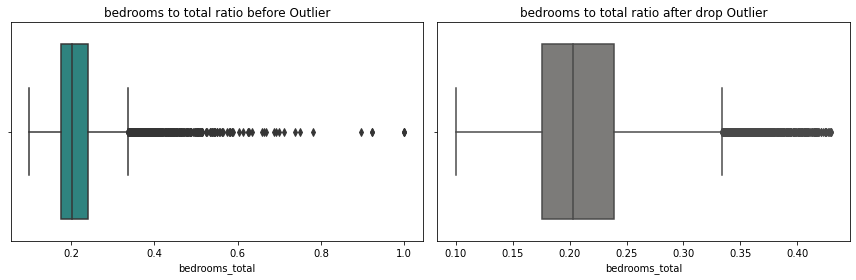

In [16]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
font_dict = {'fontsize': 14}
ax = np.ravel(ax)
bedrooms_total=pd.DataFrame(df_new['total_bedrooms']/df_new['total_rooms'],columns=["bedrooms_total"])
print("bedrooms to total ratio mean : ",bedrooms_total.mean()[0])
sns.boxplot(data=bedrooms_total,x='bedrooms_total',palette='viridis', ax=ax[0]).set_title('bedrooms to total ratio before Outlier')
bedrooms_total=Zscore_outlier(column='bedrooms_total',df=bedrooms_total)
print("bedrooms to total ratio mean : ",bedrooms_total.mean()[0])
sns.boxplot(data=bedrooms_total,x='bedrooms_total',palette='cividis', ax=ax[1]).set_title('bedrooms to total ratio after drop Outlier')
ax = np.reshape(ax, (1, 2))
plt.tight_layout()
plt.show()
bedrooms_total=bedrooms_total.mean()[0]

In [17]:
df_new['total_bedrooms']=df_new['total_bedrooms'].fillna(bedrooms_total*df_new['total_rooms'])

In [18]:
df_new.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

###### Plot the Distribution of total_bedrooms before and after Filling in missing values

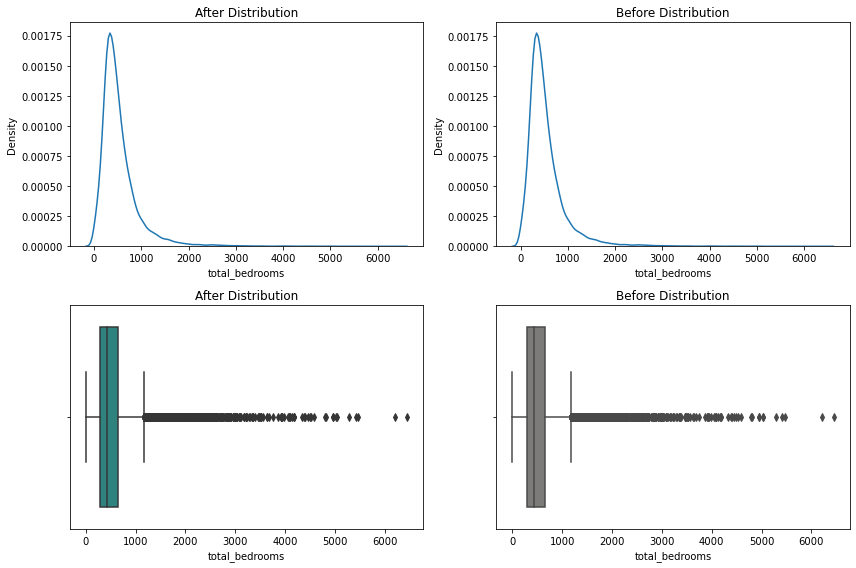

In [19]:
fig, ax = plt.subplots(2,2, figsize = (12,8))
font_dict = {'fontsize': 14}
ax = np.ravel(ax)
sns.kdeplot(data=df_new,x='total_bedrooms',ax = ax[0],palette='viridis').set_title('After Distribution')
sns.kdeplot(data=df,x='total_bedrooms',ax = ax[1],palette='cividis').set_title('Before Distribution')
sns.boxplot(data=df_new,x='total_bedrooms', ax=ax[2],palette='viridis').set_title('After Distribution')
sns.boxplot(data=df,x='total_bedrooms', ax=ax[3],palette='cividis').set_title('Before Distribution')
ax = np.reshape(ax, (2, 2))
plt.tight_layout()

### Step 8: Outlier and Deleting Observations

In [20]:
data=df_new.copy()
df_new.shape

(20640, 10)

In [21]:
def Distribution2(columne,data,i):
    fig, ax = plt.subplots(1,3, figsize = (15,5))
    font_dict = {'fontsize': 14}
    title=['Before Distribution','After Distribution']
    ax = np.ravel(ax)
    if i==1:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne ,ax = ax[0],color='r').set_title(title[i])
        sns.boxplot(data=data,x=columne ,ax = ax[1],palette='magma').set_title(title[i])
        sns.scatterplot(data=data,x=columne ,ax = ax[2], y=data['median_house_value'],color='r').set_title(title[i])
    else:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne ,ax = ax[0],color='#2171b5').set_title(title[i])
        sns.boxplot(data=data,x=columne ,ax = ax[1],color='#2171b5').set_title(title[i])
        sns.scatterplot(data=data,x=columne ,ax = ax[2], y=data['median_house_value'],color='#2171b5').set_title(title[i])
    ax = np.reshape(ax, (1, 3))
    plt.tight_layout()

##### 1. total_bedrooms

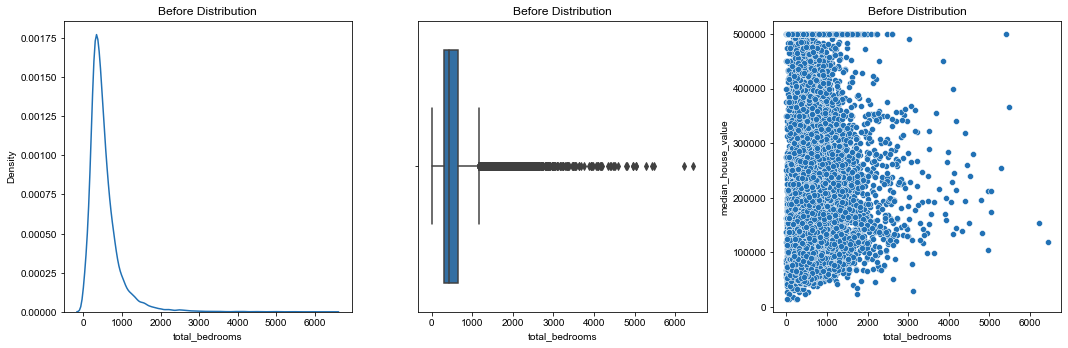

In [22]:
Distribution2(columne='total_bedrooms',data=data,i=0)

In [23]:
data[data['total_bedrooms']>=3000].shape

(67, 10)

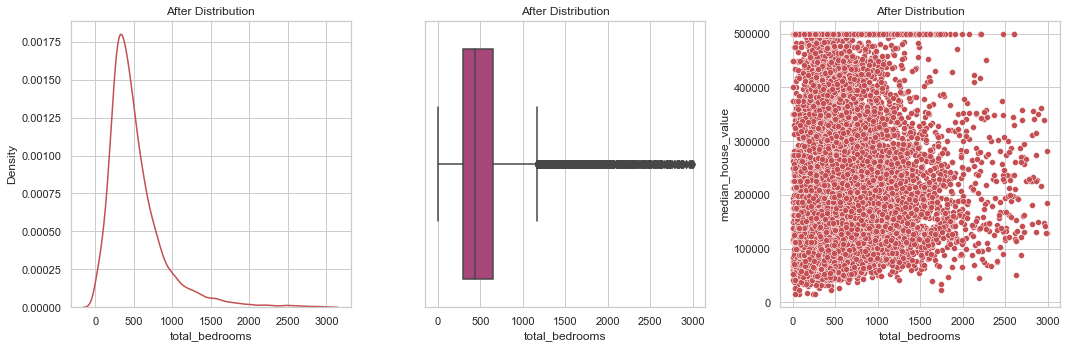

In [24]:
data=data[data['total_bedrooms']<3000]
Distribution2(columne='total_bedrooms',data=data,i=1)

##### 2. total_rooms

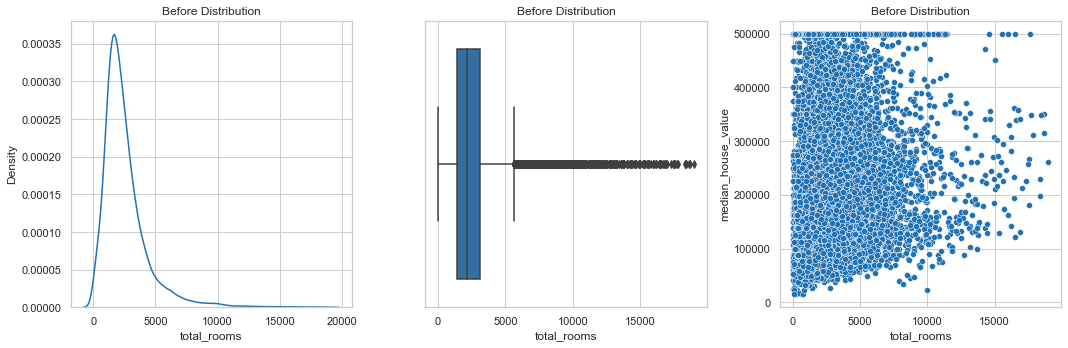

In [25]:
Distribution2(columne='total_rooms',data=data,i=0)

In [26]:
data[data['total_rooms']>=15000].shape

(44, 10)

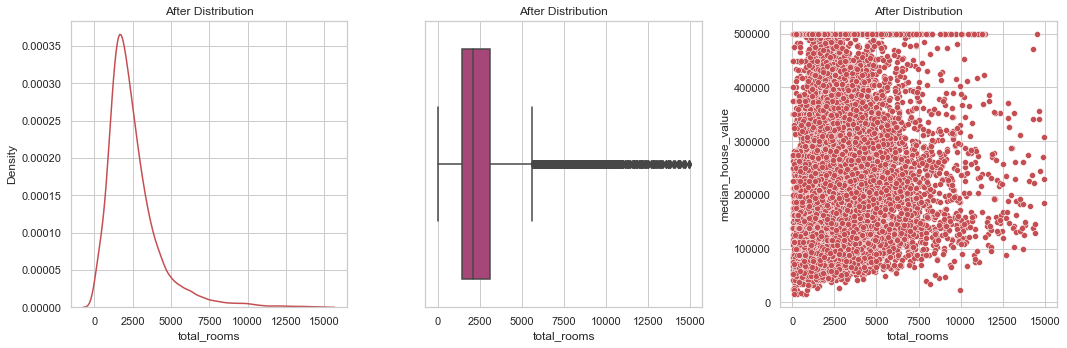

In [27]:
data=data[data['total_rooms']<15000]
Distribution2(columne='total_rooms',data=data,i=1)

##### 3. housing_median_age

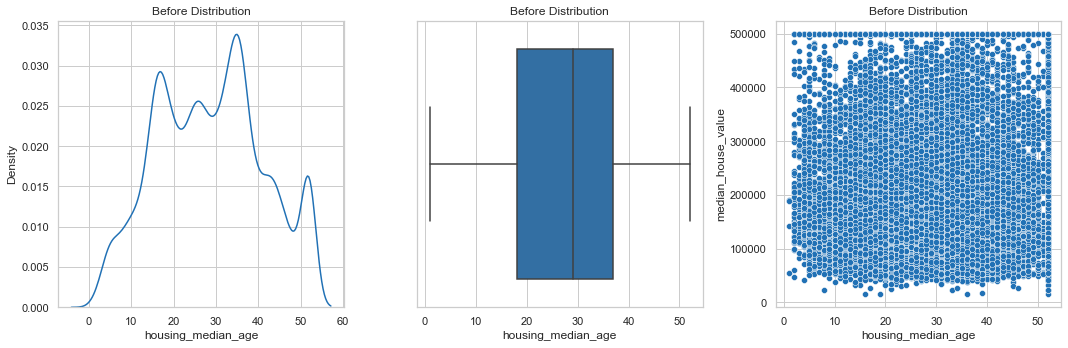

In [28]:
Distribution2(columne='housing_median_age',data=data,i=0)

###### no Outliers

##### 4. population

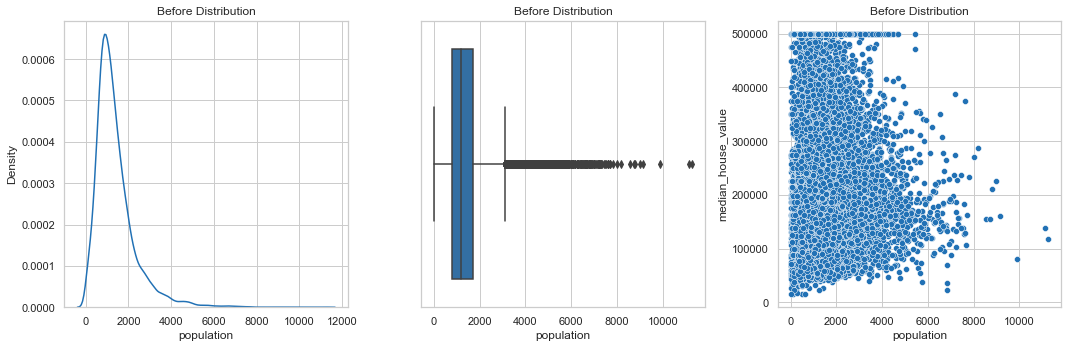

In [29]:
Distribution2(columne='population',data=data,i=0)

In [30]:
data[data['population']>=6500].shape

(64, 10)

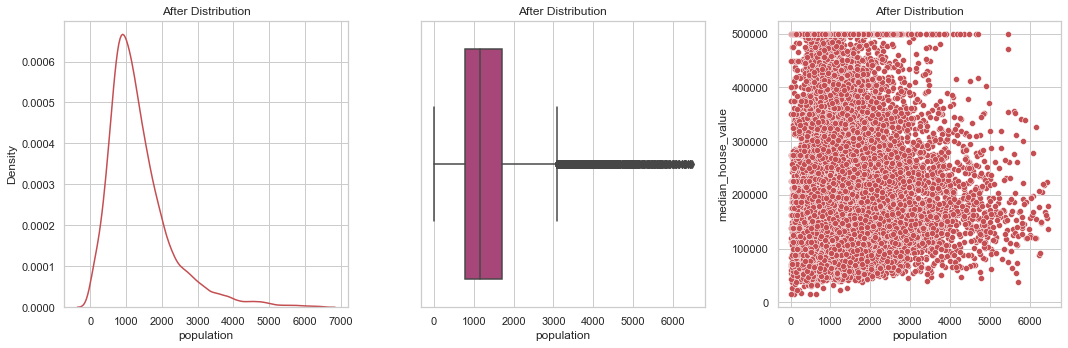

In [31]:
data=data[data['population']< 6500]
Distribution2(columne='population',data=data,i=1)

##### 5. households

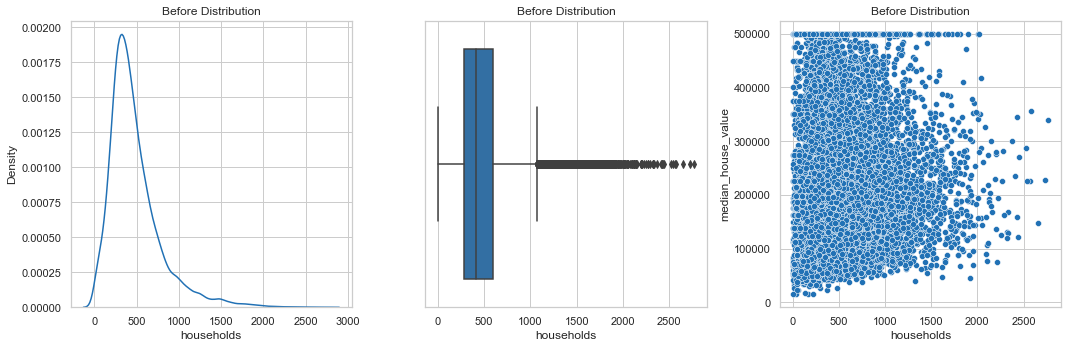

In [32]:
Distribution2(columne='households',data=data,i=0)

In [33]:
data[data['households']>=2000].shape

(54, 10)

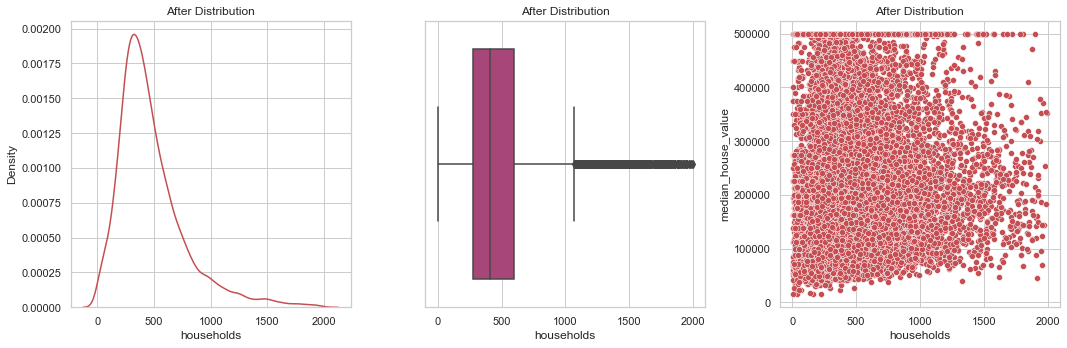

In [34]:
data=data[data['households']<2000]
Distribution2(columne='households',data=data,i=1)

##### 6. median_income

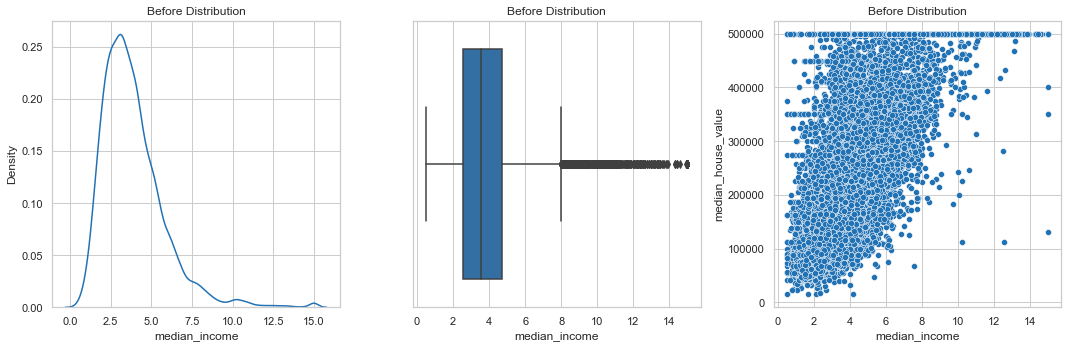

In [35]:
Distribution2(columne='median_income',data=data,i=0)

In [36]:
data[data['median_income']>=9].shape

(405, 10)

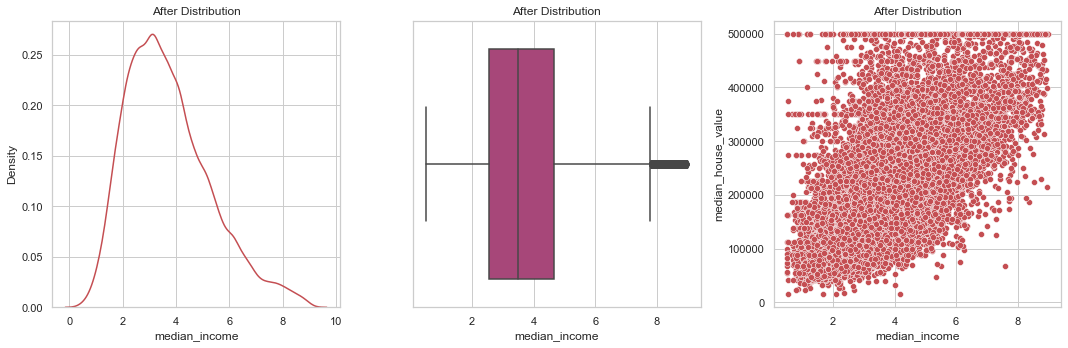

In [37]:
data=data[data['median_income']< 9]
Distribution2(columne='median_income',data=data,i=1)

In [38]:
data.shape

(20006, 10)

### Step 9: Encoding categorical features

In [39]:
ocean_proximity_le = LabelEncoder()
data['ocean_proximity'] = ocean_proximity_le.fit_transform(data['ocean_proximity'])
#gender_le.classes_

In [40]:
ocean_proximity_le.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [41]:
data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5077,-118.29,33.98,44.0,2261.0,555.0,1348.0,455.0,1.9125,97200.0,0
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0,1
19096,-122.60,38.24,16.0,2621.0,416.0,1247.0,386.0,4.8603,198400.0,0
15125,-116.86,32.87,17.0,5799.0,921.0,2630.0,843.0,5.0524,285400.0,0
4085,-118.39,34.15,29.0,917.0,181.0,379.0,183.0,3.4612,425000.0,0


### Step 10: Drop unimportant columns

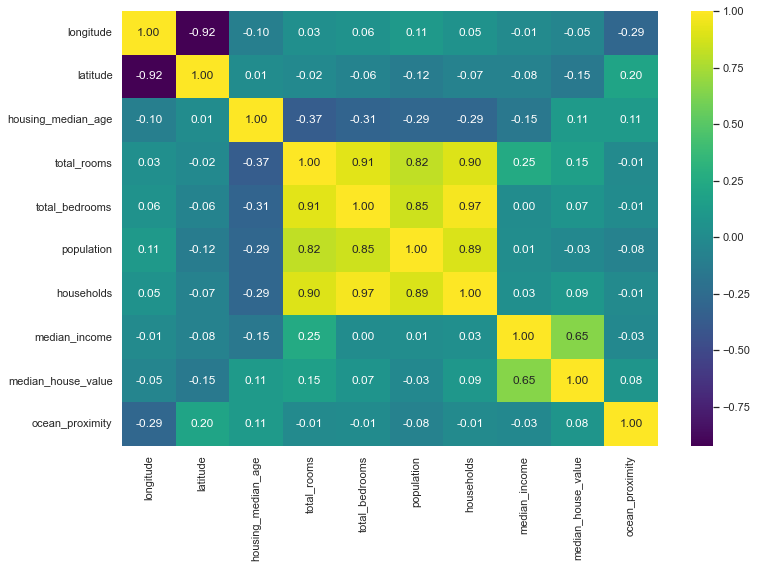

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='viridis')
plt.show()

In [43]:
data.drop(['longitude','latitude'],axis=1,inplace=True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20006 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20006 non-null  float64
 1   total_rooms         20006 non-null  float64
 2   total_bedrooms      20006 non-null  float64
 3   population          20006 non-null  float64
 4   households          20006 non-null  float64
 5   median_income       20006 non-null  float64
 6   median_house_value  20006 non-null  float64
 7   ocean_proximity     20006 non-null  int32  
dtypes: float64(7), int32(1)
memory usage: 1.3 MB


### Step 11: Scaling and Split the data

In [45]:
data.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', 'ocean_proximity'],
      dtype='object')

In [46]:
data_=data[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity', 'median_house_value']]

In [47]:
x = data_.drop(['median_house_value'] , axis = 1).values
y= data_['median_house_value' ].values

In [48]:
ro_scaler = RobustScaler()
x = ro_scaler.fit_transform(x)

In [49]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25, random_state=42)

In [50]:
x_train.shape , x_test.shape ,y_train.shape, y_test.shape

((15004, 7), (5002, 7), (15004,), (5002,))

### Step 12: Linear Regression

In [51]:
reg = linear_model.LinearRegression()

In [52]:
reg.fit(x_train , y_train)

LinearRegression()

In [53]:
reg.score(x_train , y_train)

0.562014786781191

In [54]:
reg.score(x_test , y_test)

0.5498355664915402

In [55]:
y_pred =reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.sample(10)

,Y_test,Y_pred
2479,290000.0,196923.661518
483,142200.0,200077.283838
1597,146800.0,222536.310314
3327,220100.0,239120.931735
2959,353700.0,241738.989466
2668,138800.0,164356.447889
603,278000.0,287268.708526
1898,269800.0,279266.146198
3434,252000.0,283168.450723
1283,205500.0,167966.478122


In [56]:
pd.DataFrame(reg.coef_ , data_.columns[:-1] ,  columns=['Coeficient'])

,Coeficient
housing_median_age,36557.266361
total_rooms,-58452.610968
total_bedrooms,61265.063019
population,-40594.436243
households,46872.981876
median_income,118488.681267
ocean_proximity,3791.510744


In [57]:
reg_score = r2_score(y_test , y_pred)
reg_score

0.5498355664915402

In [58]:
p = len(x_train[0])
n = len(y_train)
adj_R1 = 1-(1-reg_score)*(n-1)/(n-p-1)
adj_R1

0.5496254337204973

In [59]:
adj_R1< reg_score

True

In [60]:
reg_mae = mean_absolute_error(y_test , y_pred)
reg_mae

54185.47367643643

In [61]:
reg_mape = mean_absolute_percentage_error(y_test , y_pred)
reg_mape

0.335481522017255

In [62]:
mse = mean_squared_error(y_test , y_pred)
mse

5389142136.190037

In [63]:
reg_mse = mean_squared_error(y_test , y_pred)
reg_rmse  = np.sqrt(reg_mse)
reg_rmse

73410.77670335627

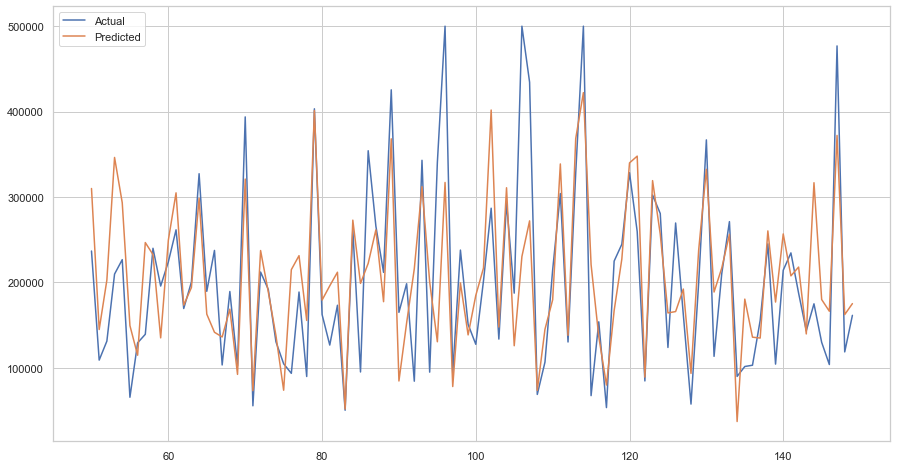

In [64]:
plt.figure(figsize=(15,8))
plt.plot(df[50:150])
plt.legend(["Actual" , "Predicted"])
plt.show()

### Step 13: Ridg regression

In [65]:
rid = linear_model.Ridge(  alpha=0.9)

In [66]:
rid.fit(x_train , y_train)

Ridge(alpha=0.9)

In [67]:
rid.score(x_train , y_train)

0.5620147051421062

In [68]:
rid.score(x_test , y_test)

0.5498385288504755

In [69]:
pd.DataFrame(rid.coef_ , data_.columns[:-1] ,  columns=['Coeficient'])

,Coeficient
housing_median_age,36553.308619
total_rooms,-58367.437390
total_bedrooms,61166.177545
population,-40583.909970
households,46877.004125
median_income,118446.816599
ocean_proximity,3791.848254


In [70]:
y_pred_rid =reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_rid})
df.sample(10)

,Y_test,Y_pred
1998,75000.0,97280.234216
1124,435000.0,422129.812922
2691,54300.0,89715.631499
2656,141600.0,181631.134068
4553,500001.0,320935.737903
1664,43700.0,73330.025348
4854,500001.0,156348.906785
1246,298400.0,201888.327702
4914,82800.0,176605.573722
4175,165500.0,241556.377111


In [71]:
rid_score = r2_score(y_test , y_pred_rid)
rid_score

0.5498355664915402

In [72]:
p = len(x_train[0])
n = len(y_train)
adj_R2 = 1-(1-rid_score)*(n-1)/(n-p-1)
adj_R2

0.5496254337204973

In [73]:
mse = mean_squared_error(y_test , y_pred_rid)
mse

5389142136.190037

In [74]:
mae = mean_absolute_error(y_test , y_pred_rid)
mae

54185.47367643643

In [75]:
rid_mse = mean_squared_error(y_test , y_pred_rid)
rid_rmse  = np.sqrt(rid_mse)
rid_rmse

73410.77670335627

In [76]:
mape = mean_absolute_percentage_error(y_test , y_pred_rid)
mape

0.335481522017255

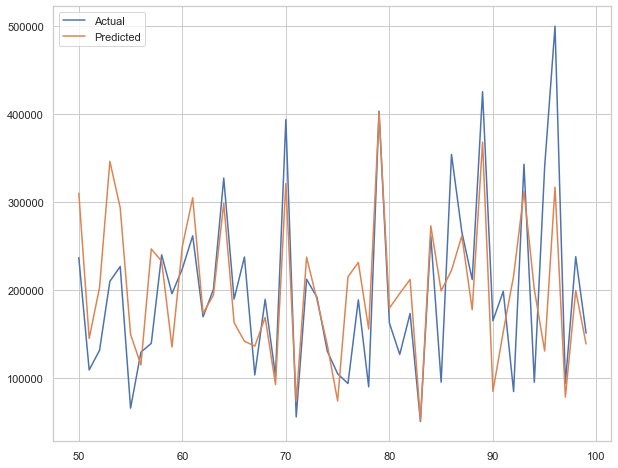

In [77]:
plt.figure(figsize=(10,8))
plt.plot(df[50:100])
plt.legend(["Actual" , "Predicted"])
plt.show()

### Step 14: Lasso Regression

In [78]:
las = linear_model.Lasso(alpha=0.9)

In [79]:
las.fit(x_train,y_train)

Lasso(alpha=0.9)

In [80]:
las.score(x_train , y_train)

0.5620147826395676

In [81]:
las.score(x_test , y_test)

0.549835773680942

In [82]:
pd.DataFrame(las.coef_ , data_.columns[:-1] ,  columns=['Coeficient'])

,Coeficient
housing_median_age,36555.841233
total_rooms,-58435.356191
total_bedrooms,61249.703344
population,-40588.212159
households,46865.019757
median_income,118481.307016
ocean_proximity,3791.371334


In [83]:
y_pred_las =reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_las})
df.sample(10)

,Y_test,Y_pred
1327,228600.0,264214.046897
1653,210300.0,208441.382306
3386,48000.0,49041.557999
2590,117100.0,164985.877245
2705,60300.0,111512.512510
247,110800.0,99866.696155
780,177900.0,207482.907212
269,90600.0,108899.109115
684,327800.0,268435.547572
4392,249300.0,215926.366813


In [84]:
las_score = r2_score(y_test , y_pred_las)
las_score

0.5498355664915402

In [85]:
p = len(x_train[0])
n = len(y_train)
adj_R2 = 1-(1-las_score)*(n-1)/(n-p-1)
adj_R2

0.5496254337204973

In [86]:
mse = mean_squared_error(y_test , y_pred_las)
mse

5389142136.190037

In [87]:
mae = mean_absolute_error(y_test , y_pred_las)
mae

54185.47367643643

In [88]:
las_mse = mean_squared_error(y_test , y_pred_las)
las_rmse  = np.sqrt(reg_mse)
las_rmse

73410.77670335627

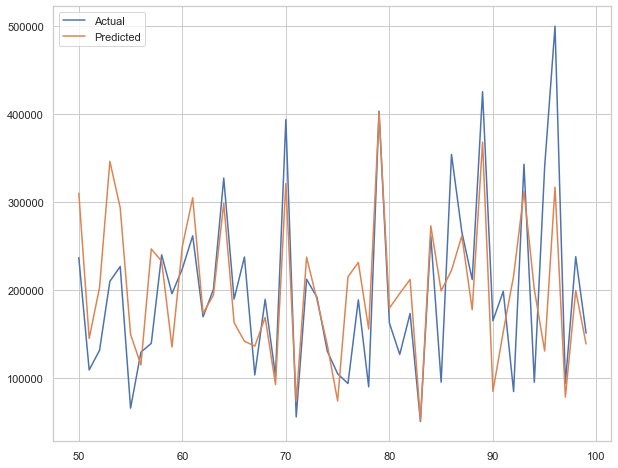

In [89]:
plt.figure(figsize=(10,8))
plt.plot(df[50:100])
plt.legend(["Actual" , "Predicted"])
plt.show()

### Step 15: Compersion between models

In [90]:
models = ['LinearRegression' , 'Ridge' , 'Lasso']
data = [[reg_score ,reg_rmse ] , [rid_score ,rid_rmse ] , [las_score ,las_rmse ]]
cols = ["r2_score" , "RMSE"]
pd.DataFrame(data=data , index= models , columns= cols).sort_values(ascending= False , by = ['r2_score'])

,r2_score,RMSE
LinearRegression,0.549836,73410.776703
Ridge,0.549836,73410.776703
Lasso,0.549836,73410.776703
